# **EmbeddingNet**

In [24]:
import math
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split

In [2]:
plt.style.use('ggplot')

In [3]:
from models.embedding_net import set_random_seed,  batches
from models.embedding_net import EmbeddingNet,  train

In [4]:
RANDOM_STATE = 1
set_random_seed(RANDOM_STATE)

In [5]:
from read_data import read_data, create_dataset, tabular_preview

In [6]:
# pick one of the available folders
from pathlib import Path
ratings, movies = read_data(Path('ml-1m'))

Dataset Preview

In [7]:
ratings.head()


,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [8]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
tabular_preview(ratings, movies)

movieId,110,260,480,589,593,608,1196,1198,1210,1270,1580,2028,2571,2762,2858
userId,,,,,,,,,,,,,,,
889,4.0,4.0,3.0,5.0,5.0,4.0,4.0,NaN,3.0,4.0,3.0,3.0,5.0,NaN,2.0
1015,4.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0,4.0,5.0,5.0,5.0,4.0
1150,2.0,5.0,NaN,2.0,3.0,5.0,4.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,4.0
1181,3.0,4.0,2.0,5.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,5.0,4.0,3.0
1449,3.0,3.0,2.0,2.0,5.0,5.0,3.0,4.0,2.0,2.0,4.0,3.0,4.0,4.0,4.0
1680,1.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,3.0,4.0,5.0,3.0,5.0,5.0
1941,5.0,5.0,5.0,3.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,1.0
1980,4.0,4.0,4.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0
2063,5.0,4.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,4.0,3.0,2.0,5.0,4.0,5.0


**Dataset Preparation**

In [10]:
(n, m), (X, y), _ = create_dataset(ratings)
print(f'Embeddings: {n} users, {m} movies')
print(f'Dataset shape: {X.shape}')
print(f'Target shape: {y.shape}')

Embeddings: 6040 users, 3706 movies
Dataset shape: (1000209, 2)
Target shape: (1000209,)


In [11]:
for x_batch, y_batch in batches(X, y, bs=4):
    print(x_batch)
    print(y_batch)
    break

tensor([[3808, 2234],
        [1388,  143],
        [4509,  849],
        [1016, 2393]])
tensor([[4.],
        [4.],
        [2.],
        [3.]])


**Embeddings**

As it is a natural language dataset, embedding has to be done. We haved done it with neural based embedding, we can also try other embedding methods availble like word2vec, glove or Onehot encoding.

In [12]:
EmbeddingNet(n, m, n_factors=150, hidden=100, dropouts=0.5)


EmbeddingNet(
  (u): Embedding(6040, 150)
  (m): Embedding(3706, 150)
  (drop): Dropout(p=0.02, inplace=False)
  (hidden): Sequential(
    (0): Linear(in_features=300, out_features=100, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
  )
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

In [13]:
EmbeddingNet(n, m, n_factors=150, hidden=[100, 200, 300], dropouts=[0.25, 0.5])

EmbeddingNet(
  (u): Embedding(6040, 150)
  (m): Embedding(3706, 150)
  (drop): Dropout(p=0.02, inplace=False)
  (hidden): Sequential(
    (0): Linear(in_features=300, out_features=100, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.25, inplace=False)
    (3): Linear(in_features=100, out_features=200, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=200, out_features=300, bias=True)
    (7): ReLU()
  )
  (fc): Linear(in_features=300, out_features=1, bias=True)
)

**Training Loop**

In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
datasets = {'train': (X_train, y_train), 'val': (X_valid, y_valid)}
dataset_sizes = {'train': len(X_train), 'val': len(X_valid)}

In [15]:
minmax = float(ratings.rating.min()), float(ratings.rating.max())
minmax

(1.0, 5.0)

In [16]:
net = EmbeddingNet(
    n_users=n, n_movies=m, 
    n_factors=150, hidden=[500, 500, 500], 
    embedding_dropout=0.05, dropouts=[0.5, 0.5, 0.25])

In [17]:
history, lr_history, best_weights = train(net, n_epochs=100, datasets=datasets, minmax=minmax)

c:\users\murtu\appdata\local\programs\python\python38\lib\site-packages\torch\optim\lr_scheduler.py:129: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


loss improvement on epoch: 1
[001/100] train: 0.8869 - val: 0.8225
loss improvement on epoch: 2
[002/100] train: 0.7964 - val: 0.8062
loss improvement on epoch: 3
[003/100] train: 0.8000 - val: 0.7973
loss improvement on epoch: 4
[004/100] train: 0.7580 - val: 0.7860
loss improvement on epoch: 5
[005/100] train: 0.7662 - val: 0.7843
loss improvement on epoch: 6
[006/100] train: 0.7275 - val: 0.7837
[007/100] train: 0.7402 - val: 0.7840
[008/100] train: 0.6940 - val: 0.7898
[009/100] train: 0.7067 - val: 0.7869
[010/100] train: 0.6507 - val: 0.7988
[011/100] train: 0.6672 - val: 0.7921
[012/100] train: 0.6102 - val: 0.8109
[013/100] train: 0.6316 - val: 0.8013
[014/100] train: 0.5793 - val: 0.8188
[015/100] train: 0.6027 - val: 0.8117
[016/100] train: 0.5549 - val: 0.8266
early stopping after epoch 016


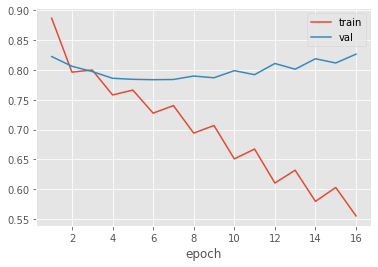

In [18]:
ax = pd.DataFrame(history).drop(columns='total').plot(x='epoch')


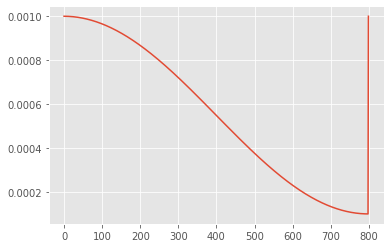

In [19]:
bs = 2000

iterations_per_epoch = int(math.ceil(dataset_sizes['train'] // bs))
_ = plt.plot(lr_history[:2*iterations_per_epoch])


**Сохранение весов нейронной сети**

In [20]:

net.load_state_dict(best_weights)
with open('best.weights', 'wb') as file:
    pickle.dump(best_weights, file)

<All keys matched successfully>

**Получение предсказаний**

In [21]:
groud_truth, predictions = [], []
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
with torch.no_grad():
    for batch in batches(*datasets['val'], shuffle=False, bs=bs):
        x_batch, y_batch = [b.to(device) for b in batch]
        outputs = net(x_batch[:, 0], x_batch[:, 1], minmax)
        groud_truth.extend(y_batch.tolist())
        predictions.extend(outputs.tolist())

groud_truth = np.asarray(groud_truth).ravel()
predictions = np.asarray(predictions).ravel()

In [22]:
final_loss = np.sqrt(np.mean((predictions - groud_truth)**2))
print(f'Final RMSE: {final_loss:.4f}')

Final RMSE: 0.8856
